# Lecture 07: Ammonia Equilibrium - Part 2

This lecture covers the next few equilibrium example problems.  Specifically, this example extends consideration to the impacts of changing temperature and pressure during ammonia synthesis.

In [1]:
import numpy as np
import scipy.optimize as opt 
import matplotlib.pyplot as plt

## Problem Statement

Consider the gas-phase reaction of molecular nitrogen with molecular hydrogen to produce ammonia:

$$N_2 (g) + 3H_2 (g) \leftrightharpoons 2N\!H_3 (g) \label{eq1} \tag{1}$$

We will again carry it out in a batch reactor at 1 bar, and we will start with 1 mole of $N_2$ and 3 moles of $H_2$. In the first example, we considered this exact system at 298K. We concluded that this reaction is extremely favorable at 298K and 1 bar, and we would expect an equilibrium conversion of N$_2$ of approximately 97%. 

Unfortunately, N$_2$ bond dissociation is incredibly difficult! Despite very favorable *thermodynamics* at 298K, $N_2$ and $H_2$ will react very, very slowly to form $N\!H_3$ at these conditions, so it is effectively impossible to run this reaction at 298K. We would *never* be able to achieve industrially relevant rates of ammonia synthesis at 298K!

<div class = "alert alert-block alert-info">
<b>Remember</b>: The rate of a reaction controls how long we have to wait for products to form.  This impacts the length of batch reaction times, and it also impacts the size of flow reactors. In general, to achieve an identical conversion level, slow reactions will require larger reactors than fast reactions. This makes slow reactions more capital intensive processes.
</div>

### Temperature Effects on Chemical Equilibrium

More realistically, ammonia synthesis as we've written it would probably need to be carried out at much higher temperatures to accomplish $N_2$ dissociation at an appreciable rate.  Assuming we do not add a catalyst to the system, let's say that we'd have to run ammonia synthesis at 873K to achieve an industrially relevant reaction rate. We will still perform the reaction at 1 bar.

Without doing any calculations, at 873K, do you expect the equilibrium conversion of $N_2$ to increase or decrease compared to the 97% equilibrium conversion that we calculated at 298K and 1 bar?

Exothermic reactions become less favorable as the temperature increases.  So I would expect a lower equilibrium conversion than 97% at 873K.  How low?  I can't say until we calculate the equilibrium constant and solve this problem:

$$\exp\left(\frac{-\Delta G^\circ}{RT}\right) = K = \prod_{j = 1}^{N_S}a_j^{\nu_j} \label{eq2}\tag{2}$$

### Thermodynamic data

As usual, we start this problem by considering available thermodynamic data, which we need to solve for the equilibrium constant:

$$K = \exp\left(\frac{-\Delta G^\circ}{RT}\right) \label{eq3}\tag{3}$$

To do that, we have to calculate $\Delta G^\circ$ at the standard state.  For gas phase reactions like this one, the standard state is pure species at 1 bar and the reaction temperature.  We've *increased* the reaction temperature to 873K in this example, so now we need to calculate the Gibbs free energy change at 1 bar and 873K.  Previously, we only had data at 298K, but we can correct for temperature effects using heat capacities.  I've added them to the table accordingly.

|Species | ${H_j}^\circ$ (kJ mol$^{-1}$)| ${S_j}^\circ$ (J mol$^{-1}$ K$^{-1}$) | ${C_{p_j}}^\circ$ (J mol$^{-1} $K$^{-1}$)|
|-------------|:-----------------------:|:-------------------------------------:|:-----------------------------------------|
| $N_2$ (g)   | 0                       |191.60                                 |29.12                                     | 
| $H_2$ (g)   | 0                       |130.68                                 |28.84                                     | 
| $N\!H_3$ (g)| -45.9                   |192.77                                 |35.64                                     |

Now, we can us the data at $T_0 = 298K$ and the heat capacity to calculate the enthalpy of each species at 873 using the following equation:

$$H_j = H_{j,0} + \int_{T_0}^{T} C_{p_j} dT \label{eq4}\tag{4}$$

For constant heat capacities like we have here, this equation simplifies to:

$$H_j = H_{j,0} + C_{p_j}(T - T_0)\label{eq5}\tag{5}$$

Similarly, we can calculate entropies at a temperature other than $T_0 = 298K$ using the following equation:

$$S_j = S_{j,0} + \int_{T_0}^{T} \frac{C_{p_j}}{T} dT\label{eq6}\tag{6}$$

For constant heat capacities like we have in this problem, this equation simplifies to:

$$S_j = S_{j,0} + C_{p_j}\ln\left(\frac{T}{T_0}\right)\label{eq7}\tag{7}$$

In the cell below, we calculate enthalpies and entropies at 873K based on our data at 298K and the heat capacities we have available. Just to keep the notation simple, I'll use $N$ = $N_2$, $H = H_2$, and $A$ = $N\!H_3$.

In [33]:
#Enthalpies at 298K, 1 bar
HN0 = 0
HH0 = 0
HA0 = -45.9*1000 #J/mol

#Entropies at 298K, 1 bar
SN0 = 191.60 #J/mol/K
SH0 = 130.68 #J/mol/K
SA0 = 192.77 #J/mol/K

#Heat capacities
CPN = 29.12 #J/mol/K
CPH = 28.84 #J/mol/K
CPA = 35.64 #J/mol/K

#Calculate thermodynamic state functions at T not equal to T0 = 298
T1 = 873   #K
T0 = 298   #K
R  = 8.314 #J/mol/K

HN = HN0 + CPN*(T1 - T0) #J/mol
HH = HH0 + CPH*(T1 - T0) #J/mol
HA = HA0 + CPA*(T1 - T0) #J/mol

SN = SN0 + CPN*np.log(T1/T0) #J/mol/K
SH = SH0 + CPH*np.log(T1/T0) #J/mol/K
SA = SA0 + CPA*np.log(T1/T0) #J/mol/K

DH = 2*HA - HN - 3*HH #J/mol
DS = 2*SA - SN - 3*SH #J/mol/K
DG = DH - T1*DS        #J/mol

K1  = np.exp(-DG/R/T1)     #Dimensionless
print(f'At T = {T1:0.0f}K, the thermodynamic equilibrium constant for ammonia synthesis is K = {K1:0.2E}')

At T = 873K, the thermodynamic equilibrium constant for ammonia synthesis is K = 1.52E-06


### Why not write a function that you can reuse over and over at any T?

It is generally useful for us to be able to embed repetitive calculations--like evaluating an equilibrium constant at a specific temperature--inside a function that will allow us to compute the equilibrium constant for *any* temperature. See below -- this is really just moving all of the calculations we did above ***inside*** of a function definition and then returning the value of the equilibrium constant from that function. This way, we can pass any Temperature into our function as an argument, and our function will spit out the corresponding equilibrium constant for ammonia synthesis at that temperature and 1 bar pressure for pure gas reference states.

<div class = "alert alert-block alert-info">
    <b>Notice</b>: A function in a programming language can be much more complex than our conventional idea of a function as, e.g., f(x) = x<sup>2</sup>.  In the example below, the function K(T) includes many calculations! But it still serves the same basic purpose of a function -- it takes input from the user (temperature), and it returns the output we're interested in (K at that temperature)!
    </div>

In [34]:
def K(T):
    T0 = 298   #K
    R  = 8.314 #J/mol/K
    
    #Enthalpies at 298K, 1 bar
    HN0 = 0
    HH0 = 0
    HA0 = -45.9*1000 #J/mol

    #Entropies at 298K, 1 bar
    SN0 = 191.60 #J/mol/K
    SH0 = 130.68 #J/mol/K
    SA0 = 192.77 #J/mol/K

    #Heat capacities
    CPN = 29.12 #J/mol/K
    CPH = 28.84 #J/mol/K
    CPA = 35.64 #J/mol/K

    #Calculate thermodynamic state functions at T not equal to T0 = 298
    HN = HN0 + CPN*(T - T0) #J/mol
    HH = HH0 + CPH*(T - T0) #J/mol
    HA = HA0 + CPA*(T - T0) #J/mol

    SN = SN0 + CPN*np.log(T/T0) #J/mol/K
    SH = SH0 + CPH*np.log(T/T0) #J/mol/K
    SA = SA0 + CPA*np.log(T/T0) #J/mol/K

    DH = 2*HA - HN - 3*HH #J/mol
    DS = 2*SA - SN - 3*SH #J/mol/K
    DG = DH - T*DS        #J/mol

    K  = np.exp(-DG/R/T)     #Dimensionless
    return K

print(f'At T = {T1:0.0f}K, the thermodynamic equilibrium constant for ammonia synthesis is K = {K(T1):0.2E}')

At T = 873K, the thermodynamic equilibrium constant for ammonia synthesis is K = 1.52E-06


From this, we can see that the reaction is going to be pretty unfavorable at T = 873K, where the equilibrium constant is $K = 1.52\times10^{-6}$

### If you can graph it, why not graph it?

It is helpful to visualize how the thermodynamic equilibrium constant changes for ammonia synthesis as a function of temperature. Now that we've written a function, $K(T)$, this is easy to do in Python. *Remember*:  K = 1 is a relatively neutral reaction in terms of favorability.  As the equilibrium constant becomes very large ($K > 1000$), that reaction is favorable.  As K becomes very small ($K < 0.001$), we would classify the reaction as unfavorable.  This plot gives you a good sense for where the reaction becomes unfavorable as a function of temperature.

<div class = "alert alert-block alert-success">
    <b>Notice</b>: We are reusing the function, K(T), that we built above for plotting.  Handy!
</div>

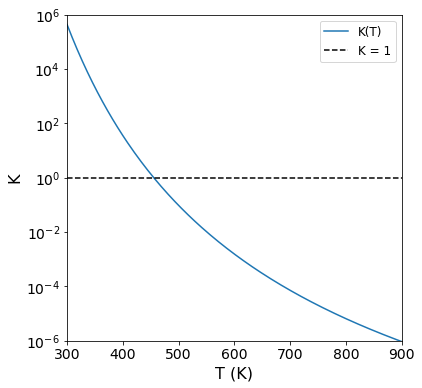

In [35]:
Tvals = np.linspace(300, 900, 200)
plt.figure(figsize = (6,6))
plt.plot(Tvals, K(Tvals), label = 'K(T)')
plt.hlines(1, Tvals[0], Tvals[-1], linestyle = 'dashed', color = 'black', label = 'K = 1') #This is a reference line of K = 1
plt.yscale('log')
plt.ylabel('K', fontsize = 16)
plt.ylim(10**-6, 10**6)
plt.yticks(10.0**np.arange(-6, 7, 2), fontsize = 14)
plt.xlabel('T (K)', fontsize = 16)
plt.xlim(300, 900)
plt.xticks(np.arange(300, 901, 100), fontsize = 14)
plt.legend(fontsize = 12)
plt.show()

### Solving for the Equilibrium composition

Assume that we run ammonia synthesis at 873K starting with 1 mole of $N_2$ and 3 moles of $H_2$.  What conversion of Nitrogen do we expect at equilibrium?  What is the composition (mole fractions) of the mixture at equilibrium.

We approach this the exact same way as we did the Ammonia Synthesis Example in L06. The only difference is that, in this case, since we are running the reaction at 873K, we have to use $\Delta G^\circ$ calculated at 873K to calculate our equilibrium constant (at 1 bar and based on pure gas reference states).  We did this above, and we found that, at 873K, the equilibrium constant for ammonia synthesis is $K = 1.52 \times 10^{-6}$.

Now that we have the equilibrium constant at 873K, 1 bar, and for pure gas reference states, we can address the composition dependence by considering:

$$K = \prod_{j = 1}^{N_S}a_j^{\nu_j} \label{eq8}\tag{8}$$

Now we need to work through the right hand side of that expression and resolve the thermodynamic activities. We can apply this equation to the specific example of ammonia synthesis to find:

$$K = \frac{{a_{N\!H_3}}^{2}}{{a_{N_2}}{a_{H_2}}^3} \label{eq9}\tag{9}$$

Now, we recall our definitions for thermodynamic activities of gases in a mixture:

$$a_j = \frac{\hat{f}_j}{f_j^\circ} \label{eq10}\tag{10}$$

The numerator is the fugacity of species $j$ under reaction conditions $(T = 873K, P = 1 bar, \chi_j = ?)$. The denominator is the fugacity of species $j$ in its reference state. Our reference state for gas-phase species is a pure species at 1 bar and the reaction temperature (T = 873K). Our convention for calculating fugacities of gases in a mixture uses the Lewis Randall rule.  With these things in mind, formally, we have:

$$a_j = \frac{y_j \phi_j P}{y_j^\circ \phi_j^\circ  P^\circ} \label{eq12}\tag{12}$$

Looking at the numerator, we are operating this reactor at 1 bar, so the fugacity coefficient for species j under reaction conditions, $\phi_j$ is 1. Looking at the denominator, the reference state is a pure species, so $y_j^\circ = 1$.  Further, that pure species is at 1 bar, so $\phi_j^\circ = 1$

This gives the usual result for low pressure gases:

$$a_j = \frac{y_j P}{P^\circ} \label{eq13}\tag{13}$$

Now we apply this equation to all of the species participating in the reaction.  Notice that I'm still retaining $P$ and $P^\circ$ in my solution:

$$K = \frac{\left(\frac{y_{N\!H_3}P}{P^\circ}\right)^2}{\left(\frac{y_{N_2}P}{P^\circ}\right) \left(\frac{y_{H_2}P}{P^\circ}\right)^3} \label{eq14}\tag{14}$$

We see multiple pressures and reference pressures that will cancel, giving:

$$K = \frac{{y_{N\!H_3}}^2}{y_{N_2}{y_{H_2}}^3} \left(\frac{P^\circ}{P}\right)^2 \label{eq15}\tag{15}$$

Now we're at a point that we can't really go any further because we have 3 unknowns ($y_{N\!H_3}$, $y_{N_2}$, and $y_{H_2}$) and only 1 equation.  As before, we address this by solving for the molar quantity of each species using an extent of reaction, stoichiometric coefficients, and the starting quantity of each species.

### Expressing Mole Fractions as functions of Extent

In general, the mole fraction for a species in the gas phase is defined as:

$$y_j = \frac{N_j}{N_{\textrm{total}}} = \frac{N_j}{\sum_j N_j} \label{eq16}\tag{16}$$

We also remember that we can express the moles of each species at any point in the reaction, $N_j$ in terms of the extent of reaction(s) that are occuring in that system.  

$$N_j = N_{j,0} + \nu_j \varepsilon \label{eq17}\tag{17}$$

I want to do this for all species in the reactor.  I also see that the total number of moles shows up in the definition of a mole fraction, so I need to track that quantity as well.  It is usually a good idea to organize all of this information in a mole table. We will again relabel the compounds using N (N$_2$), H (H$_2$), and A (NH$_3$).

$$N (g) + 3H (g) \leftrightharpoons 2A (g) \label{eq18}\tag{18}$$

|Species   |In   |Change           |End                  |
|:---------|:---:|:---------------:|:-------------------:|
| N$_2$    |NN0  |-1$\varepsilon$  |NN0 - 1$\varepsilon$ | 
| H$_2$    |NH0  |-3$\varepsilon$  |NH0 - 3$\varepsilon$ |
| NH$_3$   |NA0  |+2$\varepsilon$  |NA0 + 2$\varepsilon$ |
| Total    |NT0  |-2$\varepsilon$  |NT0 - 2$\varepsilon$ |


We can make these substitutions into the definitions of mole fractions, ultimately finding:

$$K = \frac{\left(N_{A,0} + 2\varepsilon\right)^2 \left(N_{T,0} - 2\varepsilon\right)^2}{\left(N_{N,0} - 1\varepsilon\right) \left(N_{H,0} - 3\varepsilon\right)^3} \left(\frac{P^\circ}{P}\right)^2 \label{eq19}\tag{19}$$

### Solving the problem with opt.newton()

Inspection of this equation reveals that we know everything except for the extent of reaction.  1 Equation, 1 unknown.  This can be solved with numerical methods; see below, I use opt.newton since it is univariate. If I just want to solve the above equation, it's easy enough.  Use a lambda function as in the Example in Lecture 06. I am using an initial guess for the equilibrium extent of 0.01 because I know that, with an equilibrium constant of $K = 1.5\times10^{-6}$, the reaction is very unfavorable.

<div class = "alert alert-block alert-info">
              <b>Notice</b>:  The only difference between this solution and the one in Lecture 06 is the value of the equilibrium constant.  Everything else in the problem is identical.  The strategies we've used to define activities, etc. is completely general, and it will apply for any condition we are interested in.  Also notice, I haven't plugged in numbers. The solution is left symbolic, which makes it much easier to modify to account for changes in the problem statement.
              </div>

In [36]:
Kthermo = K(T1)
NN0 = 1 #mole
NH0 = 3 #moles
NA0 = 0 #moles
NT0 = NN0 + NH0 + NA0
P0  = 1 #bar
P   = 1 #bar

obj1 = lambda ex: (NA0 + 2*ex)**2 * (NT0 - 2*ex)**2 / (NN0 - ex) / (NH0 - 3*ex)**3 * P0**2 / P**2 - Kthermo

ans, info = opt.newton(obj1, 0.01, full_output = True)
print(f'At T = {T1:0.0f}K, the extent of reaction at equilibrium is {ans:0.2E} moles')

At T = 873K, the extent of reaction at equilibrium is 7.99E-04 moles


### Using the equilibrium extent to calculate composition and conversion


Now that we know the reaction extent at equilibrium, it is easy enough to calculate the composition of the mixture:

In [37]:
yN = (NN0 - ans)/(NT0 - 2*ans)
yH = (NH0 - 3*ans)/(NT0 - 2*ans)
yA = (NA0 + 2*ans)/(NT0 - 2*ans)
XN = ans/NN0

print(f'At T = {T1:0.0f}K, equilibrium mole fractions for N2, H2, and NH3 are {yN:0.3f}, {yH:0.3f}, {yA:0.3E}')
print(f'At T = {T1:0.0f}K, the equilibrium fractional conversion of N2 is {XN:0.2E}')

At T = 873K, equilibrium mole fractions for N2, H2, and NH3 are 0.250, 0.750, 3.994E-04
At T = 873K, the equilibrium fractional conversion of N2 is 7.99E-04


### Why not make a more general function so we aren't stuck doing so many hand calculations?

Although there is nothing wrong with the solution above, I *prefer* to address the problem as below, which is to embed all of the calculations of numbers of moles, mole fractions, and thermodynamic activities into my objective function--see `obj2(ex)` below.  This makes it easy for me to look at the equations and understand exactly what they mean, which helps me to identify mistakes in my code.

Compare this to the function `obj1(ex)` above.  To me, `obj2(ex)` is far easer to understand in terms of physical significance of each term...

In [40]:
def obj2(ex):
    T1  = 873
    P   = 1.0 #bar
    P0  = 1.0 #bar
    NN0 = 1.0 #moles
    NH0 = 3.0 #moles
    NA0 = 0.0 #moles
    
    NN  = NN0 - ex
    NH  = NH0 - 3*ex
    NA  = NA0 + 2*ex
    NT  = NN + NH + NA
    
    yN  = NN/NT
    yH  = NH/NT
    yA  = NA/NT
    
    aN  = yN*P/P0
    aH  = yH*P/P0
    aA  = yA*P/P0
    
    KTHERMO = K(T1)
    KCOMP = aA**2/aN/aH**3
       
    return KCOMP - Kthermo  #We want to find the value of extent where KCOMP - Kthermo = 0

ans, info = opt.newton(obj2, 0.01, full_output = True) #This solves for the equilibrium extent

print(info, '\n') #Let's make sure it converged...

#Solve for conversion and mole fractions.
NN0 = 1.0 #moles
NH0 = 3.0 #moles
NA0 = 0.0 #moles
NN = NN0 - ans
NH = NH0 - 3*ans
NA = NA0 + 2*ans
NT = NN + NH + NA
XN = (NN0 - NN)/NN0
yN = NN/NT
yH = NH/NT
yA = NA/NT

print(f'At T = {T1:0.0f}K, the equilibrium conversion of N2 is {XN:0.2E}, yN is {yN:0.3f}, yH is {yH:0.3f}, and yA is {yA:0.2E}')

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.0007985377054623165 

At T = 873K, the equilibrium conversion of N2 is 7.99E-04, yN is 0.250, yH is 0.750, and yA is 3.99E-04


### What can we do to improve the equilibrium conversion?

In cases where a gas-phase reaction causes a decrease in the total number of moles, one can create a more favorable equilibrium position by increasing reaction pressure. This is true in the case of ammonia synthesis:

$$N_2 + 3H_2 \leftrightharpoons 2N\!H_3 \label{eq20}\tag{20}$$

An increse in pressure favors the side with fewer moles, so this will drive ammonia synthesis to the right and allow us to achieve higher equilibrium conversion of $N_2$ and a higher equilibrium yield of ammonia.  Let's see how that plays out.

### Adapting the Solution for High Pressure

We will still run the reaction at 873K and starting with 1 mole of $N_2$ and 3 moles of $H_2$; howver, we will increase the reactor pressure to an as yet unspecified higher pressure, P.  For the moment, I will say that, no matter how high we make the pressure, the gases still behave as ideal gases.  This is technically incorrect, but it avoids our having to calculate fugacity coefficients, which we'll save for Recitation 03.

Reviewing, to determine the composition of the reactor at equilibrium, we need to solve:

$$\exp\left(\frac{-\Delta G^\circ}{RT}\right) = K = \prod_{j = 1}^{N_S}a_j^{\nu_j} \label{eq21}\tag{21}$$

We'll do that in steps.

### Finding the Equilibrium constant, K


The value $\Delta G^\circ$ that appears in the equation above is the standard state Gibbs free energy change for reaction.  

<div class = "alert alert-block alert-info">
    For equilibrium problems, we always specify this at the reaction temperature (here, T = 873K), at 1 par pressure ($P^\circ = 1$ bar), and for pure gas species (since this is a gas phase reaction).
    </div>

As far as I can tell, we already did this above.  We are increasing pressure, but that does not change the value of our thermodynamic equilibrium constant.  It only depends on temperature, and we are still operating at 873K!!!

So, we already know the answer to this part:

$$K = 1.52\times10^{-6}$$

### Finding the composition dependencies using activities

Now we approach the right hand side of the equilibrium equation:

$$K = \prod_{j = 1}^{N_S}a_j^{\nu_j} \label{eq22}\tag{22}$$

Absolutely nothing has changed about the way we handle this! We know that this expands to:

$$K = \frac{{a_{N\!H_3}}^{2}}{{a_{N_2}}{a_{H_2}}^3} \label{eq23}\tag{23}$$

We still define thermodynamic activities of gases in a mixture:

$$a_j = \frac{\hat{f}_j}{f_j^\circ} \label{eq24}\tag{24}$$

The numerator is the fugacity of species $j$ under reaction conditions $(T = 873K, P = ? \ \textrm{bar}, \chi_j = ?)$. The denominator is the fugacity of species $j$ in its reference state. Our reference state for gas-phase species is a pure species at 1 bar and the reaction temperature (T = 873K). Our convention for calculating fugacities of gases in a mixture uses the Lewis Randall rule.  With these things in mind, formally, we have:

$$a_j = \frac{y_j \phi_j P}{y_j^\circ \phi_j^\circ  P^\circ} \label{eq25}\tag{25}$$

Looking at the numerator, we are operating this reactor at some unknown high pressure "P" bar, so the fugacity coefficient for species j under reaction conditions, $\phi_j$ is probably not actually 1.  That said, I am explicitly specifying these gases presently behave as ideal gases at all pressures, so we will make the normally bad assumption that $\phi_j$ is 1 just because I've written the problem that way. 

Looking at the denominator, the reference state is a pure species, so $y_j^\circ = 1$.  Further, that pure species is at 1 bar, so $\phi_j^\circ = 1$

Because we assumed ideal gas behavior, we get the result for low pressure gases:

$$a_j = \frac{y_j P}{P^\circ} \label{eq26}\tag{26}$$

Now we substitute the activity definition into the equilibrium expression as usual:

$$K = \frac{\left(\frac{y_{N\!H_3}P}{P^\circ}\right)^2}{\left(\frac{y_{N_2}P}{P^\circ}\right) \left(\frac{y_{H_2}P}{P^\circ}\right)^3} \label{eq27}\tag{27}$$

We see multiple pressures and reference pressures that will cancel, giving:

$$K = \frac{{y_{N\!H_3}}^2}{y_{N_2}{y_{H_2}}^3} \left(\frac{P^\circ}{P}\right)^2 \label{eq28}\tag{28}$$

Comparision with the last two problems shows that nothing is different about the approach.  All we are doing is changing the pressure, which appears on the right hand side of the equation.  As we change the pressure, it requires the mole fractions of species to change since the equilibrium constant is fixed at a value of $K = 1.52\times10^{-6}$ once we set temperature ot 873K.

We can solve this equation as usual with any root finding algorithm.  I am literally copying the code from a few cells back, changing the objective function name to `obj3`, changing the reactor pressure to 10 bar, and then running opt.newton as before.

In [41]:
Kthermo = K(T1)
NN0 = 1 #mole
NH0 = 3 #moles
NA0 = 0 #moles
P0  = 1 #bar
P   = 1000 #bar

obj3 = lambda ex: (NA0 + 2*ex)**2 * (NT0 - 2*ex)**2 / (NN0 - ex) / (NH0 - 3*ex)**3 * P0**2 / P**2 - Kthermo

ans, info = opt.newton(obj3, 0.30, full_output = True)
print(f'The extent of reaction at Equilibrium is {ans:0.2E} moles')

yN = (NN0 - ans)/(NT0 - 2*ans)
yH = (NH0 - 3*ans)/(NT0 - 2*ans)
yA = (NA0 + 2*ans)/(NT0 - 2*ans)
XN = ans/NN0

print(f'At T = {T1:0.0f}K and P = {P:0.0f} bar, equilibrium mole fractions for N2, H2, and NH3 are {yN:0.3f}, {yH:0.3f}, {yA:0.2E}')
print(f'At T = {T1:0.0f}K and P = {P:0.0f} bar, the equilibrium fractional conversion of N2 is {XN:0.2E}')

The extent of reaction at Equilibrium is 3.80E-01 moles
At T = 873K and P = 1000 bar, equilibrium mole fractions for N2, H2, and NH3 are 0.191, 0.574, 2.34E-01
At T = 873K and P = 1000 bar, the equilibrium fractional conversion of N2 is 3.80E-01


Just to illustrate my personal preference again: I like to write a few more lines of code in a slightly more complex objective function, `obj4(ex)` so that Python does all of the substitutions for me.  See below.

<div class = "alert alert-block alert-info">
    <b>Notice</b>: The approach is completely general.  As I change temperature, the effect is captured in K(T), which lets' me calculate a new equilibrium constant.  As I change pressure, the effect appears in my definition of thermodyanmic activities.  So I can change either T or P at will and just re-solve the objective function at any new condition I want using <code>opt.newton()</code>.
    <div>

In [42]:
def obj4(ex):

    #Specifications for this problem
    T1  = 873 #K
    P   = 1000.0 #bar
    P0  = 1.0 #bar
    NN0 = 1.0 #moles
    NH0 = 3.0 #moles
    NA0 = 0.0 #moles
    Kthermo = K(T1)
    
    NN  = NN0 - ex
    NH  = NH0 - 3*ex
    NA  = NA0 + 2*ex
    NT  = NN + NH + NA
    
    yN  = NN/NT
    yH  = NH/NT
    yA  = NA/NT
    
    aN  = yN*P/P0
    aH  = yH*P/P0
    aA  = yA*P/P0
    
    KCOMP = aA**2/aN/aH**3
       
    return KCOMP - Kthermo  #We want to find the value of extent where KCOMP - Kthermo = 0

ans, info = opt.newton(obj4, 0.5, full_output = True) #This solves for the equilibrium extent

print(info, '\n') #Let's make sure it converged...

#Solve for conversion and mole fractions.
NN = NN0 - ans
NH = NH0 - 3*ans
NA = NA0 + 2*ans
NT = NN + NH + NA
XN = (NN0 - NN)/NN0
yN = NN/NT
yH = NH/NT
yA = NA/NT

print(f'At T = {T1:0.0f}K and P = {P:0.0f} bar, equilibrium conversion of N2 is {round(XN,4)}, yA is {round(yN, 4)}, yB is {round(yH, 4)}, and yC is {round(yA, 4)}')

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.37970588722227583 

At T = 873K and P = 1000 bar, equilibrium conversion of N2 is 0.3797, yA is 0.1914, yB is 0.5742, and yC is 0.2343


### This really doesn't seem industrially feasible

Unfortunately, the equilibrium conversion at $T = 873$K and $P = 10$ bar is still below 1%.  We'll have to do better than that to have an economically viable process.  The challenge is that, if you were to run ammonia synthesis at 873K to get adequate reaction rate, you'd need to run that process above 1000 bar to achieve anything above about 30% conversion of N2. In general, it would be very expensive to run a process at 1000 bar, and it is unlikely one could operate something at the scale of ammonia synthesis at 1000 bar.

This is where the Haber-Bosch innovation becomes critically important. The key innovation is the addition of a catalyst to ammonia synthesis, which we discuss subsequently.  

Prior to doing that, it is important to recognize that a catalyst does not change the overall thermodynamics of a reaction.  So whether or not there is a catalyst, ammonia synthesis is horribly unfavorable at 873K.  A catalyst would just allow the reaction to run at a faster rate and reach that horribly unfavorable equilbirium in a shorter time than it would without a catalyst.  See figure below for a conceptual illustration of a reaction, $A \leftrightarrow B$ with $K = 2$:

<div class = "alert alert-block alert-warning">
    A catalyst does not change the overall thermodynamic favorability of a reaction (equilibrium); it only changes how fast that reaction reaches equilibrium.
    </div>

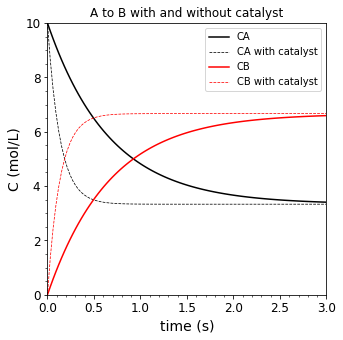

In [10]:
CA0     = 10 #moles
CB0     = 0  #moles
k1f     = 1  #1/sec
K1      = 2  
k1r     = k1f/K1 #1/sec
tmax    = 3 #seconds

k1cf    = 5
k1cr    = k1cf/K1

CAnocat = lambda t: CA0*np.exp(-(k1f + k1r)*t) + k1r/(k1f + k1r)*(CA0 + CB0)*(1 - np.exp(-(k1f + k1r)*t))
CBnocat = lambda t: CB0*np.exp(-(k1f + k1r)*t) + k1f/(k1f + k1r)*(CA0 + CB0)*(1 - np.exp(-(k1f + k1r)*t))
CAcat = lambda t: CA0*np.exp(-(k1cf + k1cr)*t) + k1cr/(k1cf + k1cr)*(CA0 + CB0)*(1 - np.exp(-(k1cf + k1cr)*t))
CBcat = lambda t: CB0*np.exp(-(k1cf + k1cr)*t) + k1cf/(k1cf + k1cr)*(CA0 + CB0)*(1 - np.exp(-(k1cf + k1cr)*t))

tspan   = np.linspace(0, tmax, 100)

plt.figure(figsize = (5,5))
plt.plot(tspan, CAnocat(tspan), label = 'CA', color = 'black', linestyle = 'solid')
plt.plot(tspan, CAcat(tspan), label = 'CA with catalyst', color = 'black', linestyle = 'dashed', linewidth = 0.75)
plt.plot(tspan, CBnocat(tspan), label = 'CB', color = 'red', linestyle = 'solid')
plt.plot(tspan, CBcat(tspan), label = 'CB with catalyst', color = 'red', linestyle = 'dashed', linewidth = 0.75)
plt.xlim(tspan[0], tspan[-1])
plt.xticks(fontsize = 12)
plt.xlabel('time (s)', fontsize = 14)
plt.ylim(0, CA0)
plt.yticks(fontsize = 12)
plt.ylabel('C (mol/L)', fontsize = 14)
plt.minorticks_on()
plt.legend(fontsize = 10, loc = 'upper right')
plt.title('A to B with and without catalyst')
plt.show()

### Why is the catalyst so important in ammonia synthesis then?

The reason the addition of a catalyst benefits this process so much is that it allows us to achieve a faster rate of reaction (relative to the non-catalytic system) at a given temperature.  Another way to think of this is that the catalytic system will not require as a high a temperature to achieve the same rate as the non-catalytic system.  So, for example, if kinetics force us to operate ammonia synthesis at 873K without a catalyst, perhaps we can achieve the same rate at 673K with a catalyst.  Since ammonia synthesis is exothermic, this reduction in operating temperature is extremely beneficial toward improving the equilibrium limitation.  We illustrate this effect in the cell below, which is just code copied from above, but we can adjust temperature and pressure to see how it impacts chemical equilibrium.

In [45]:
T2 = 673 #K
P2 = 200 #bar

def obj5(ex):

    #Specifications for this problem
    P   = P2 #bar
    P0  = 1.0 #bar
    NN0 = 1.0 #moles
    NH0 = 3.0 #moles
    NA0 = 0.0 #moles
    Kthermo = K(T2)
    
    NN  = NN0 - ex
    NH  = NH0 - 3*ex
    NA  = NA0 + 2*ex
    NT  = NN + NH + NA
    
    yN  = NN/NT
    yH  = NH/NT
    yA  = NA/NT
    
    aN  = yN*P/P0
    aH  = yH*P/P0
    aA  = yA*P/P0
    
    KCOMP = aA**2/aN/aH**3
       
    return KCOMP - Kthermo  #We want to find the value of extent where KCOMP - Kthermo = 0

ans, info = opt.newton(obj5, 0.5, full_output = True) #This solves for the equilibrium extent

print(info, '\n') #Let's make sure it converged...

#Solve for conversion and mole fractions.
NN = NN0 - ans
NH = NH0 - 3*ans
NA = NA0 + 2*ans
NT = NN + NH + NA
XN = (NN0 - NN)/NN0
yN = NN/NT
yH = NH/NT
yA = NA/NT

print(f'At T = {T2:0.0f}K and P = {P2:0.0f} bar, the equilibrium conversion of N2 is {XN:0.3f}, yA is {yN:0.3f}, yB is {yH:0.3f}, and yC is {yA:0.3f}')

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.5119797716314257 

At T = 673K and P = 200 bar, the equilibrium conversion of N2 is 0.512, yA is 0.164, yB is 0.492, and yC is 0.344
